Below is a step-by-step implementation of an RNN model for sentiment analysis based on the provided CSV file. This example uses TensorFlow/Keras, numpy, pandas, and FastAPI.

In [1]:
# Step 1: Setup and Data Preparation
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
# Load the Dataset
# Assuming the dataset has been loaded from twitter_training.csv.
# Load the dataset
df = pd.read_csv('/content/sample_data/twitter_training.csv', header=None, names=['id', 'brand', 'sentiment', 'text'])

# Drop rows with missing values
df.dropna(inplace=True)

# Filter out irrelevant sentiments
df = df[df['sentiment'].isin(['Positive', 'Negative', 'Neutral'])]

# Extract text and sentiment labels
texts = df['text'].values
labels = df['sentiment'].values

In [3]:
texts

array(['im getting on borderlands and i will murder you all ,',
       'I am coming to the borders and I will kill you all,',
       'im getting on borderlands and i will kill you all,', ...,
       'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice',
       'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice',
       'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice'],
      dtype=object)

In [4]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [5]:
# Preprocess the Textual Data and Encode Sentiment Labels
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure uniform input size
max_length = 100  # You can adjust this value
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Encode sentiment labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)


In [10]:
# Step 2: RNN Model Architecture
# We'll use a simple RNN architecture with one embedding layer, one RNN layer, and one dense output layer.

# Step 3: Building the RNN

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: Positive, Negative, Neutral
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 4: Model Training
# Train the RNN Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.3570 - loss: 1.0998 - val_accuracy: 0.3672 - val_loss: 1.0946
Epoch 2/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3633 - loss: 1.0965 - val_accuracy: 0.3672 - val_loss: 1.0945
Epoch 3/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3651 - loss: 1.0953 - val_accuracy: 0.3672 - val_loss: 1.0944
Epoch 4/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3672 - loss: 1.0943 - val_accuracy: 0.3672 - val_loss: 1.0945
Epoch 5/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3673 - loss: 1.0951 - val_accuracy: 0.3672 - val_loss: 1.0944
Epoch 6/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3638 - loss: 1.0950 - val_accuracy: 0.3672 - val_loss: 1.0945
Epoch 7/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3653 - loss: 1.0952 - val_accuracy: 0.3672 - val_loss: 1.0945
Epoch 8/10
1223/1223 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.3676 -

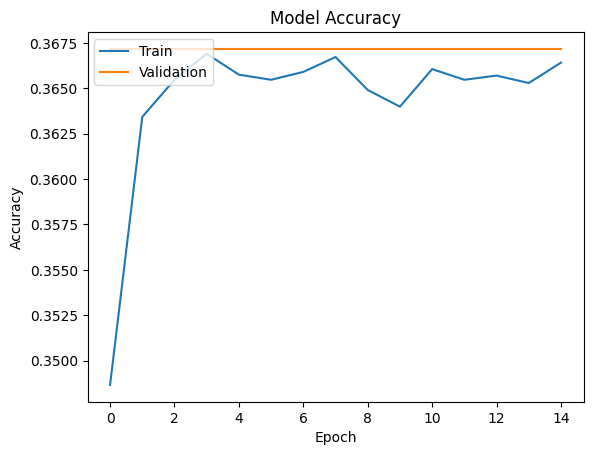

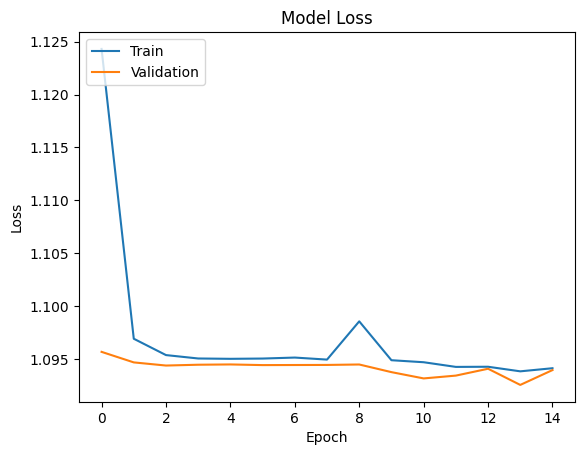

In [11]:
# 4.1 Monitor Training Progress
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [8]:
# Step 5: Model Evaluation.
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3855 - loss: 1.0934
Test Accuracy: 0.3901
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

    Negative       0.40      0.46      0.43      4427
     Neutral       0.00      0.00      0.00      3678
    Positive       0.38      0.67      0.48      4120

    accuracy                           0.39     12225
   macro avg       0.26      0.37      0.30     12225
weighted avg       0.27      0.39      0.32     12225



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Step 6: Fine-tuning and Optimization.
# Fine-tune Hyperparameters
# You can experiment with different hyperparameters such as:

# Number of RNN layers
# Number of hidden units
# Dropout rate
# Learning rate of the optimizer
# Batch size and number of epochs
# For example, you could add more layers or increase the number of hidden units:

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_length),
    SimpleRNN(128, return_sequences=True),
    Dropout(0.5),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Retrain the model with new architecture
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


612/612 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.3427 - loss: 1.1527 - val_accuracy: 0.3672 - val_loss: 1.0957
Epoch 2/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.3666 - loss: 1.0971 - val_accuracy: 0.3672 - val_loss: 1.0947
Epoch 3/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.3637 - loss: 1.0963 - val_accuracy: 0.3672 - val_loss: 1.0944
Epoch 4/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.3675 - loss: 1.0948 - val_accuracy: 0.3672 - val_loss: 1.0944
Epoch 5/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3665 - loss: 1.0946 - val_accuracy: 0.3672 - val_loss: 1.0945
Epoch 6/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.3661 - loss: 1.0948 - val_accuracy: 0.3672 - val_loss: 1.0944
Epoch 7/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3607 - loss: 1.0957 - val_accuracy: 0.3672 - val_loss: 1.0944
Epoch 8/15
612/612 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.3660 - loss: 1.0951 - val_accurac

Conclusion
This step-by-step guide provides a basic framework for building, training, and evaluating an RNN model for sentiment analysis using the provided dataset. You can further optimize the model by experimenting with different architectures, hyperparameters, and preprocessing techniques.